# 13. Principal component analysis 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 13.5 Application (1): consumption of noodles

In [5]:
# Extract data about noodles 
df = pd.read_csv('SSDSE-C-2021.csv', encoding='SHIFT=JIS', skiprows=1)
df = df[['都道府県', '生うどん・そば', '乾うどん・そば', 'パスタ', '中華麺', 'カップ麺', '即席麺', '他の麺類']]
df = df.iloc[1:]
print(df.info)

<bound method DataFrame.info of     都道府県  生うどん・そば  乾うどん・そば   パスタ   中華麺  カップ麺   即席麺  他の麺類
1    北海道     3162     2082  1266  4152  5189  1609   726
2    青森県     2964     2224  1114  5271  6088  2039   554
3    岩手県     3349     2475  1305  5991  5985  1889   898
4    宮城県     3068     2407  1339  5017  5295  1709   842
5    秋田県     3231     3409  1019  5172  5013  1680   554
6    山形県     4478     3084  1288  5236  5875  1745   754
7    福島県     2963     2705  1064  4397  5862  1687   919
8    茨城県     3353     2477  1248  4034  4562  1440   653
9    栃木県     3908     2218  1391  4534  4945  1860   742
10   群馬県     4563     1948  1203  4153  5049  1544   546
11   埼玉県     4016     2256  1487  4512  4584  1568   949
12   千葉県     3389     2277  1441  4582  4513  1840   835
13   東京都     3088     2385  1595  4592  3953  1734   974
14  神奈川県     3410     2684  1472  4484  4035  1741  1049
15   新潟県     2697     3409  1308  4192  6095  2201   612
16   富山県     3294     2738  1184  4367  5576  1928   491

In [8]:
# Convert dataframe to array
X = df.iloc[:, 1:].values
print(X.shape)
print(X[:2])

(47, 7)
[[3162 2082 1266 4152 5189 1609  726]
 [2964 2224 1114 5271 6088 2039  554]]


In [9]:
# Keep prefectures
C = df.iloc[:, 0].values
C

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

In [13]:
# Keep kinds of noodles
F = df.columns[1:].values
F

array(['生うどん・そば', '乾うどん・そば', 'パスタ', '中華麺', 'カップ麺', '即席麺', '他の麺類'],
      dtype=object)

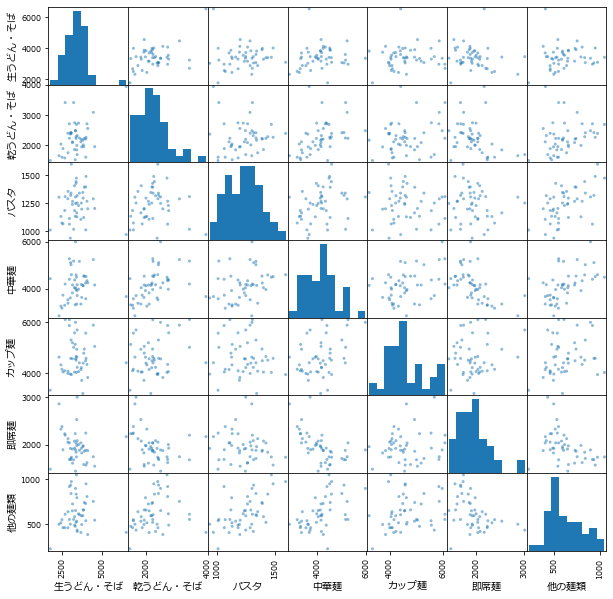

In [18]:
# Visualize relationships between each pair of two columns
plt.rcParams['font.family'] = 'Meiryo'
pd.plotting.scatter_matrix(df.iloc[:, 1:], figsize=(10, 10), alpha=0.5)
plt.show()

In [19]:
from sklearn.decomposition import PCA 

pca = PCA()
P = pca.fit_transform(X)

In [20]:
# Show principal components
pd.DataFrame(pca.components_, columns=F, index=[f'PC{i+1}' for i in range(pca.n_components_)])

,生うどん・そば,乾うどん・そば,パスタ,中華麺,カップ麺,即席麺,他の麺類
PC1,0.504964,0.408879,0.016869,0.547186,0.503093,-0.132920,0.085808
PC2,0.756743,0.150538,-0.006417,-0.292168,-0.562357,-0.025577,-0.048744
PC3,-0.257699,0.122030,0.078280,0.609924,-0.622765,-0.379370,0.093849
PC4,-0.324610,0.890367,-0.069258,-0.286218,-0.048700,0.098778,-0.055040
PC5,0.021384,0.023882,0.203051,0.355162,-0.184924,0.889120,-0.082890
PC6,0.005351,-0.035921,-0.613812,0.179672,-0.021918,-0.006870,-0.767533
PC7,-0.009304,0.025523,0.755483,-0.053613,0.075947,-0.193436,-0.618423


In [21]:
# Show principal component scores
pd.DataFrame(P, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=C)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
北海道,153.422197,-534.303380,-152.114758,-141.825326,-420.623556,-98.000194,65.117065
青森県,1101.603230,-1496.896026,-152.291415,-252.710909,175.428203,299.549245,-12.775352
岩手県,1793.476168,-1334.360530,386.555047,-402.242987,341.319685,43.976067,-95.799834
宮城県,763.378278,-877.528159,352.004070,-76.245992,-33.139404,-91.613206,0.031533
秋田県,1172.069292,-473.207765,661.354719,767.509415,34.586305,324.964692,-63.676752
山形県,2150.618638,-95.062716,-182.275461,-10.163314,12.651962,16.848009,45.427508
福島県,783.093320,-1051.263562,-321.787698,385.643816,-435.102330,-116.854804,-166.204603
茨城県,47.266081,64.767049,221.222265,200.748951,-480.932781,-50.385977,96.366308
栃木県,642.121803,68.304632,-26.751693,-345.090941,26.594589,-115.642361,58.624325
群馬県,728.332202,594.999226,-438.871291,-701.530801,-423.284924,94.830167,114.269388


<ipython-input-22-466ae0bb52e0>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


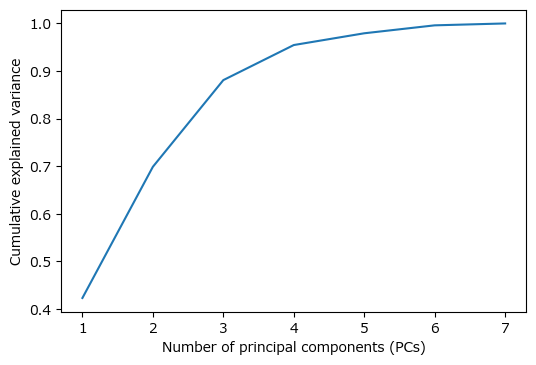

In [22]:
# Graph of relatinoships between num of principal components and cumulative explained variance
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of principal components (PCs)')
ax.set_ylabel('Cumulative explained variance')
fig.show()

<ipython-input-23-543891dc1a5a>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


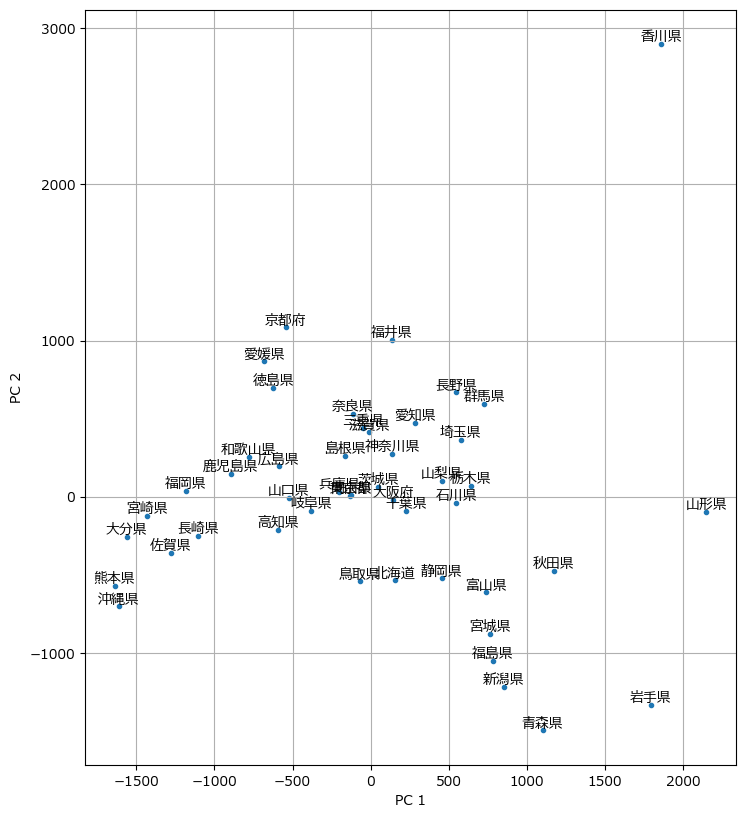

In [23]:
# Plot data to plane formed by PC1 axis and PC2 axis
fig = plt.figure(dpi=100, figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
m = ax.scatter(P[:, 0], P[:, 1], marker='.')
for i, label in enumerate(C):
    ax.text(P[i][0], P[i][1], label, ha='center', va='bottom')
ax.set_aspect('equal')
ax.grid()
fig.show()

<ipython-input-24-af8c1cdb4e25>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


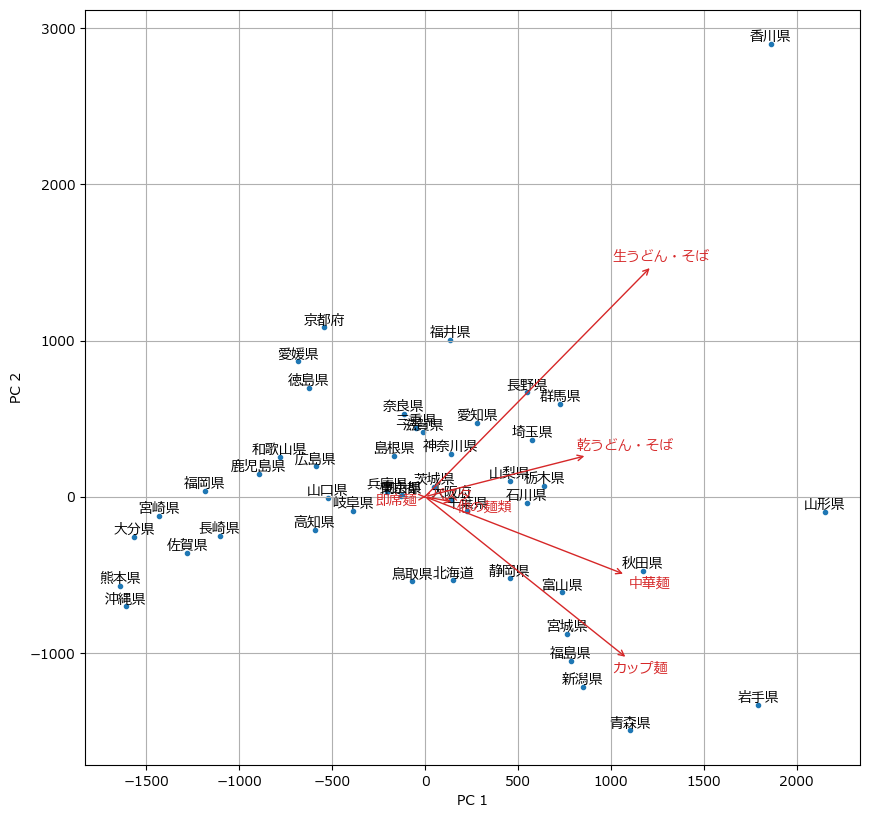

In [24]:
# Show vector of each noodle
fig = plt.figure(dpi=100, figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

m = ax.scatter(P[:, 0], P[:, 1], marker='.')
for i, label in enumerate(C):
    ax.text(P[i][0], P[i][1], label, ha='center', va='bottom')

for i, label in enumerate(F):
    ax.annotate(label, xy=(0,0), xytext=pca.components_[:2,i]*2000, color='tab:red', arrowprops=dict(arrowstyle='<-', color='tab:red'))

ax.grid()
fig.show()

## 13.6 Application (2): hand-written digits

In [25]:
from sklearn.datasets import load_digits 

X, y = load_digits(return_X_y=True)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


<ipython-input-27-97f22e7c5b18>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


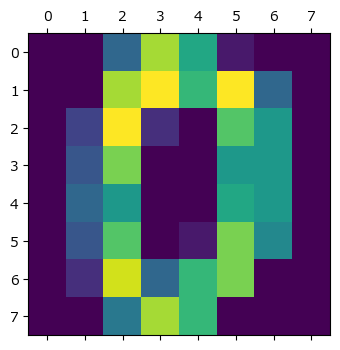

In [27]:
# Show X[0]
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.matshow(X[0].reshape(8, 8))
fig.show()

In [28]:
# Reduction from 64 dimensions to 2 demensions
pca = PCA(2)
P = pca.fit_transform(X)
print(P.shape)

(1797, 2)


In [29]:
print(P[0])

[-1.25946572 21.27488187]


<ipython-input-32-d53749981c40>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


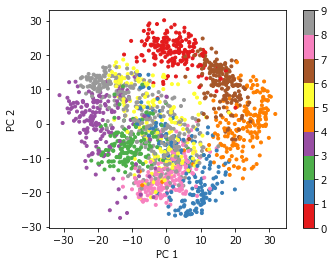

In [32]:
# Plot data to plane formed by the first two principal components

fig = plt.figure(100)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_aspect('equal')
m = ax.scatter(P[:, 0], P[:, 1], c=y, marker='.', cmap='Set1')
fig.colorbar(m)
fig.show()


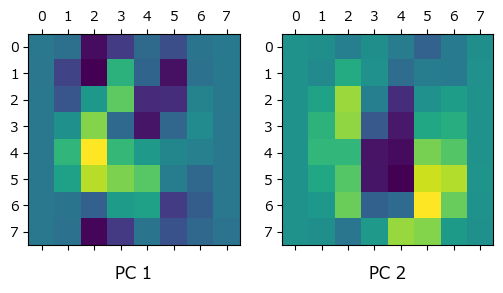

In [33]:
# Show principal components
fig, axes = plt.subplots(1, 2, dpi=100)

for i, ax in enumerate(axes.flat):
    ax.matshow(pca.components_[i].reshape(8, 8))
    ax.set_title(f'PC {i+1}', y=-0.2)

<ipython-input-34-334c872c3cb5>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


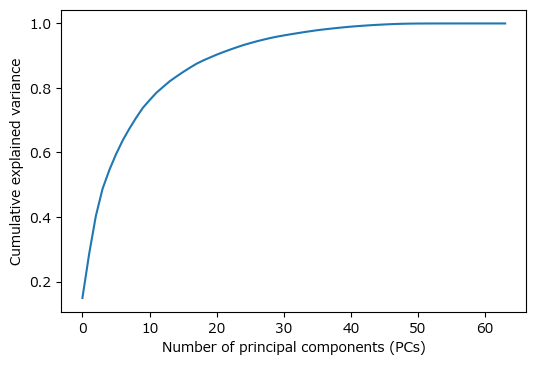

In [34]:
# Graph of relatinoships between num of principal components and cumulative explained variance
pca = PCA()
pca.fit(X)

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of principal components (PCs)')
ax.set_ylabel('Cumulative explained variance')
fig.show()

## 13.7: Application (3): eigenface

In [36]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.images.shape)

(1348, 62, 47)


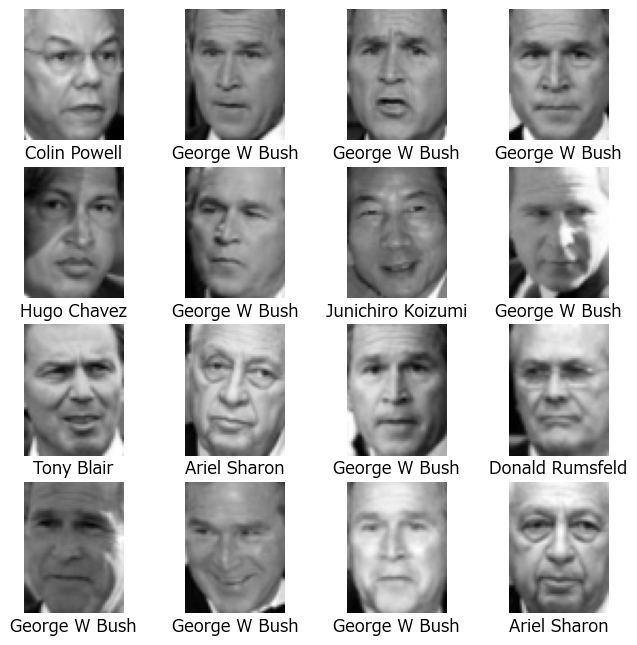

In [37]:
# Show some data
fig, axes = plt.subplots(4, 4, dpi=100, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='binary_r')
    ax.set_title(faces.target_names[faces.target[i]], y=-0.2)
    ax.set_axis_off()

In [38]:
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

<ipython-input-39-88874fb52558>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


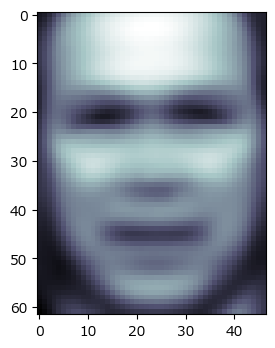

In [39]:
# Show average of data
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.imshow(pca.mean_.reshape(faces.images[0].shape), cmap='bone')
fig.show()

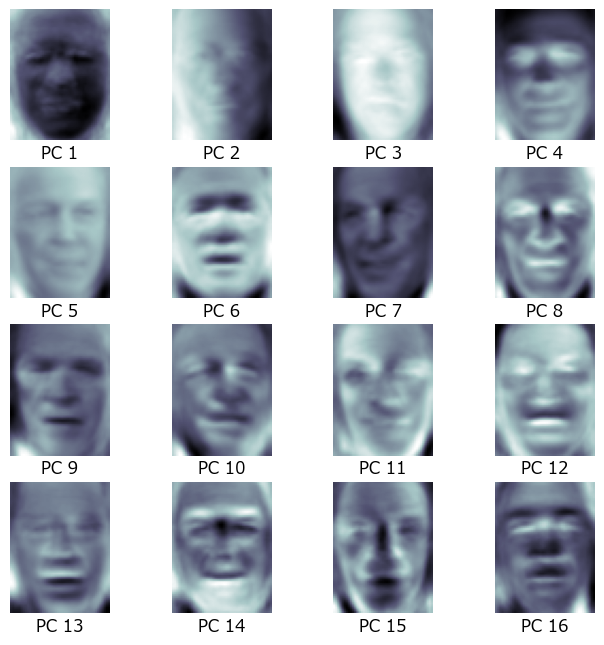

In [40]:
# Show principal components
fig, axes = plt.subplots(4, 4, dpi=100, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    ax.set_title(f'PC {i+1}', y=-0.2)
    ax.set_axis_off()

<ipython-input-41-a6ab338e1b49>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


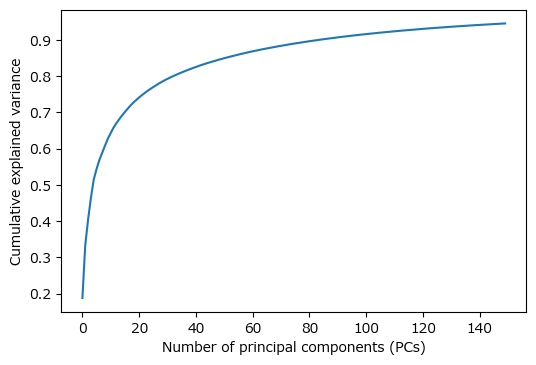

In [41]:
# Graph of relatinoships between num of principal components and cumulative explained variance
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of principal components (PCs)')
ax.set_ylabel('Cumulative explained variance')
fig.show()

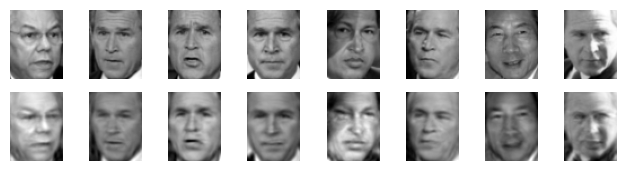

In [42]:
# Reduction from 62 * 47 dimensions to 150 dimensions

P = pca.transform(faces.data)
PB = pca.inverse_transform(P)

fig, axes = plt.subplots(2, 8, dpi=100, figsize=(8, 2))
for i in range(8):
    axes[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    axes[0, i].set_axis_off()
    axes[1, i].imshow(PB[i].reshape(62, 47), cmap='binary_r')
    axes[1, i].set_axis_off()